Objective:
The goal of this project is to analyze the dataset, preprocess the data, apply machine learning
models, and evaluate their performance in predicting car prices.

In [ ]:
import numpy as np

**Section 1:** ***Data Exploration (EDA)***

1.1 Loading the **Data**

In [ ]:
#connect drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#import satset from drive "cars_price.csv"

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/cars_price.csv')
print(df.head())


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0        3.0               NaN  alfa-romero       gas        std          two   
1        3.0                 ?  alfa-romero       gas        std          two   
2        1.0                 ?  alfa-romero       gas        std          two   
3        2.0               164         audi       gas        std         four   
4        2.0               164         audi       gas        std          NaN   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          NaN   
1  convertible          rwd           front        88.6  ...        130.0   
2    hatchback          rwd             NaN        94.5  ...        152.0   
3        sedan          fwd           front        99.8  ...        109.0   
4        sedan          4wd           front        99.4  ...        136.0   

   fuel-system  bore  stroke compression-ratio hor

2. Display the first five rows of the dataset.

In [ ]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450


3. Check for missing values in each column.

In [ ]:
print(df.isnull().sum())


symboling            3044
normalized-losses    3036
make                 3102
fuel-type            3021
aspiration           2975
num-of-doors         3009
body-style           3004
drive-wheels         3115
engine-location      2978
wheel-base           3066
length               3072
width                2943
height               3049
curb-weight          3028
engine-type          3045
num-of-cylinders     3032
engine-size          3059
fuel-system          3081
bore                 2957
stroke               2921
compression-ratio    3003
horsepower           3148
peak-rpm             2999
city-mpg             3101
highway-mpg          3027
price                3043
dtype: int64


4. What are the data types of each column? Identify numerical and categorical features.

In [ ]:
print(df.info())

numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

**1.2 Statistical Summary and Distributions**

5. Generate a summary report using .describe() for numerical columns. What insights
can you draw?

In [ ]:
print(df.describe())


          symboling    wheel-base        length         width        height  \
count  27286.000000  27264.000000  27258.000000  27387.000000  27281.000000   
mean       0.839075     98.807875    174.158302     65.918114     53.732059   
std        1.239600      6.037800     12.366150      2.143679      2.438541   
min       -2.000000     86.600000    141.100000     60.300000     47.800000   
25%        0.000000     94.500000    166.300000     64.100000     52.000000   
50%        1.000000     97.000000    173.200000     65.500000     54.100000   
75%        2.000000    102.400000    183.500000     66.900000     55.500000   
max        3.000000    120.900000    208.100000     72.300000     59.800000   

        curb-weight   engine-size  compression-ratio      city-mpg  \
count  27302.000000  27271.000000       27327.000000  27229.000000   
mean    2560.265988    127.322834          10.128243     25.158507   
std      522.483478     41.863332           3.943566      6.517298   
min     

6. Plot histograms for numerical features. What do you observe?

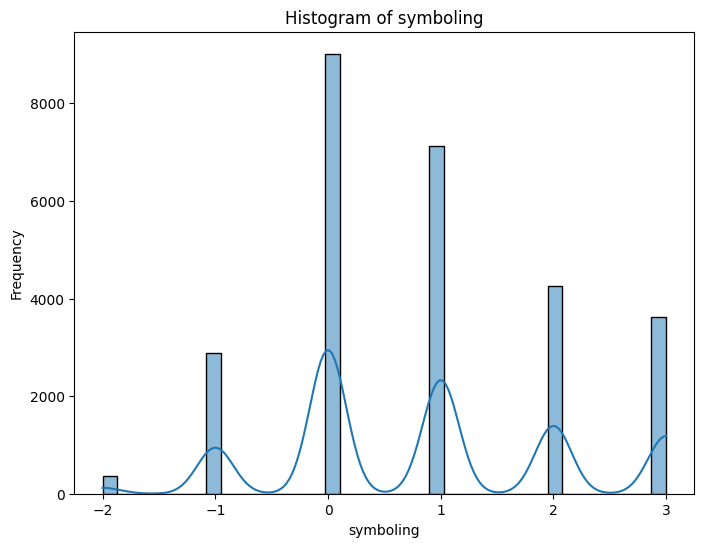

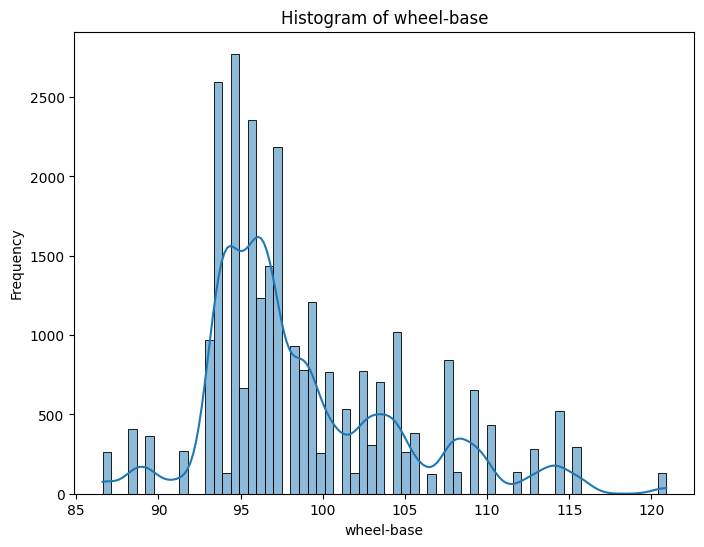

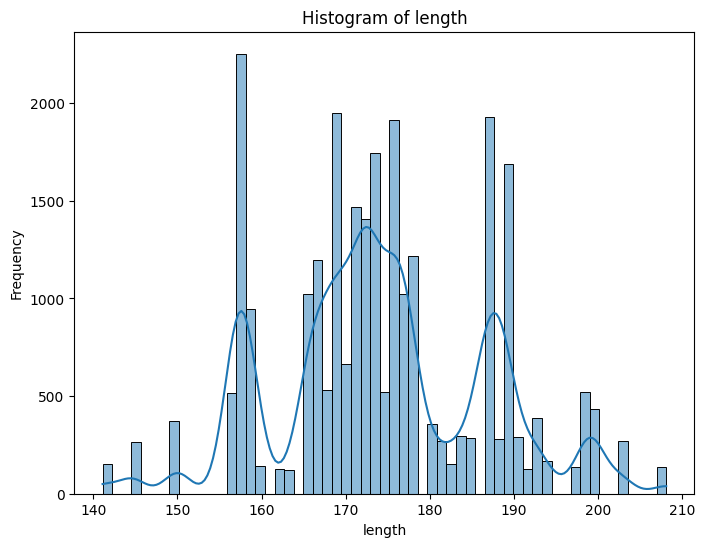

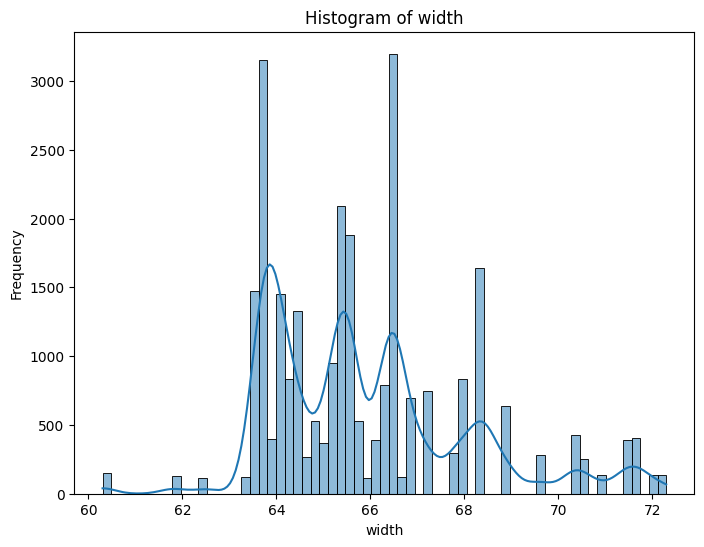

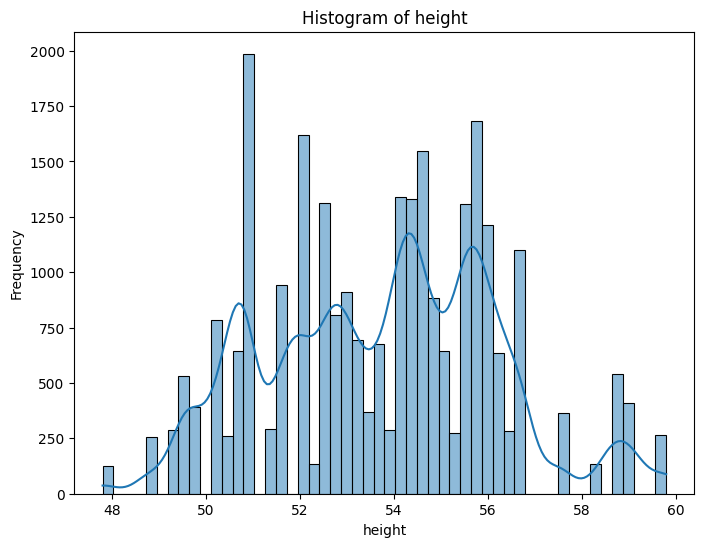

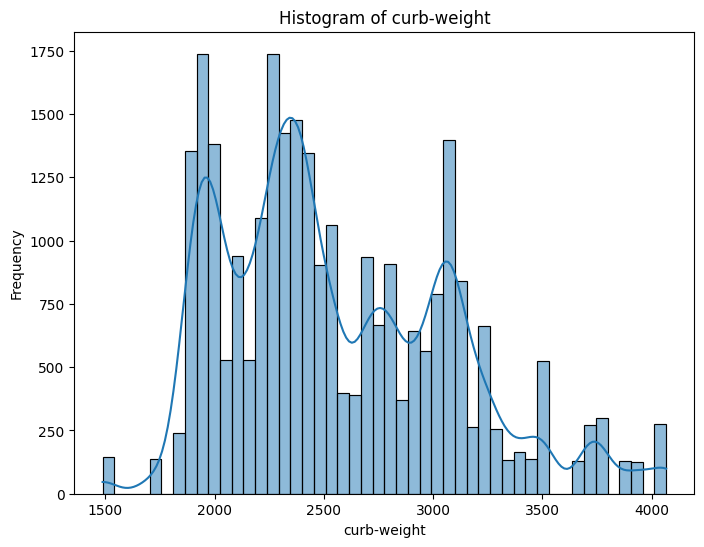

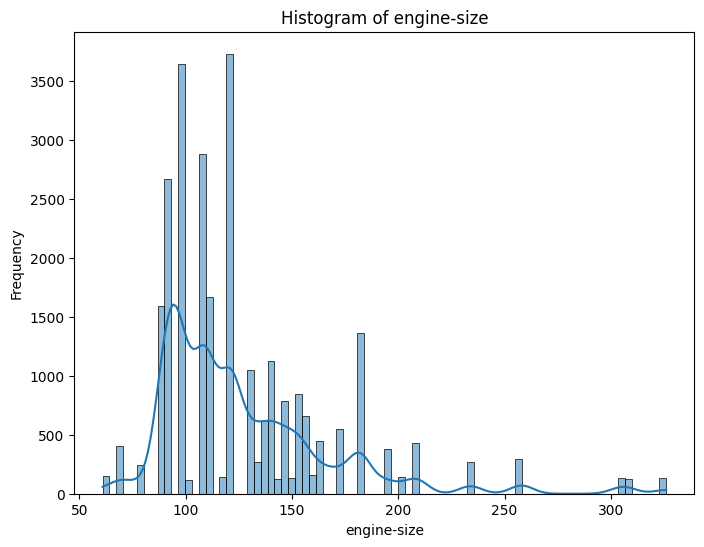

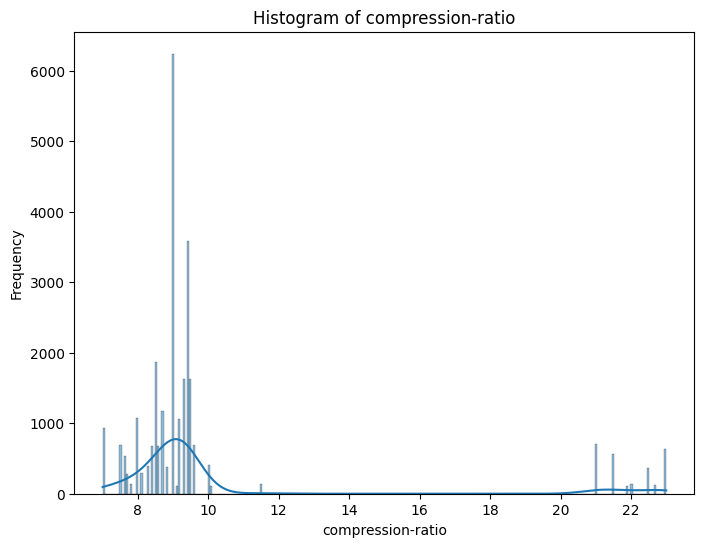

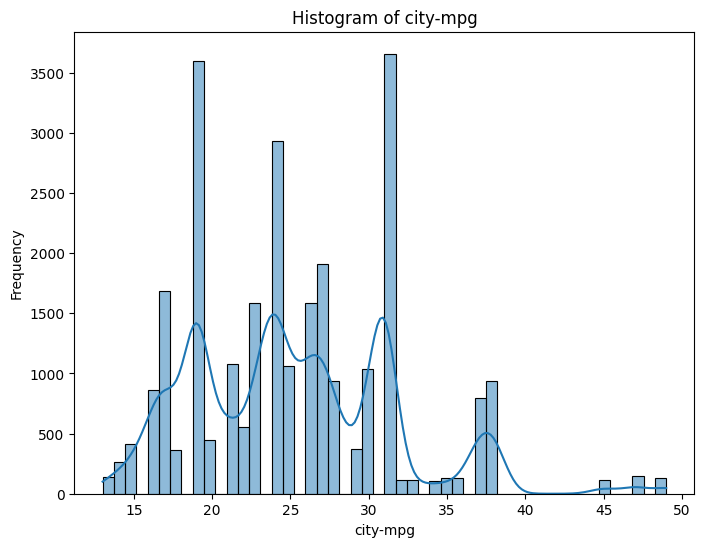

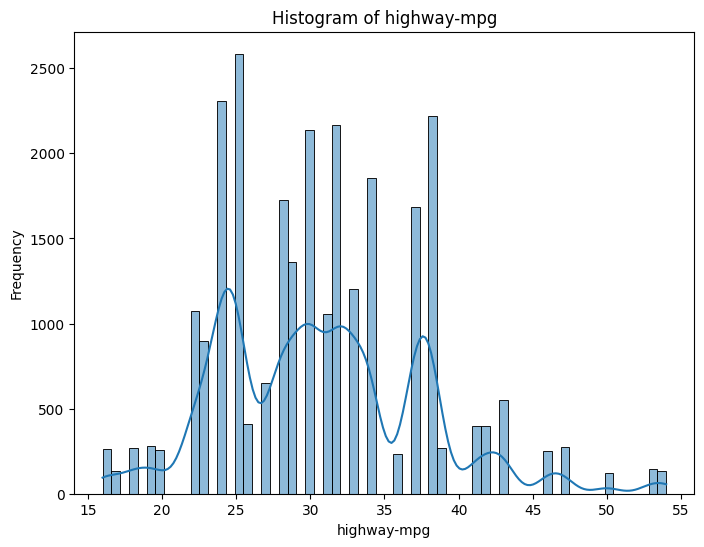

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df[col], kde=True)  # Use kde=True to show a kernel density estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


7. Identify outliers using boxplots for at least three numerical columns.

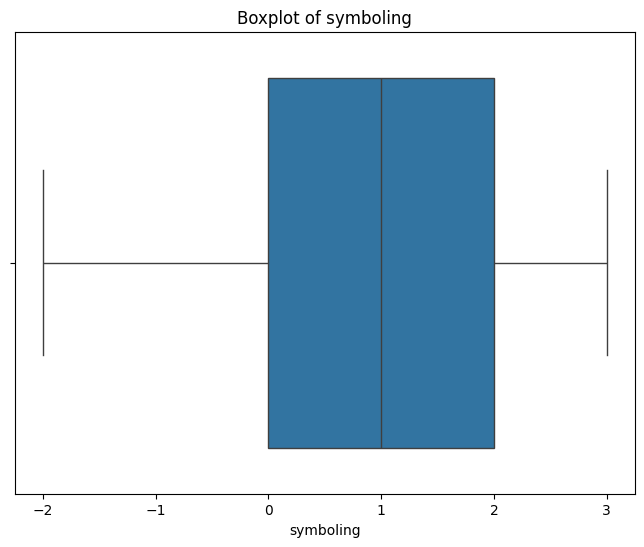

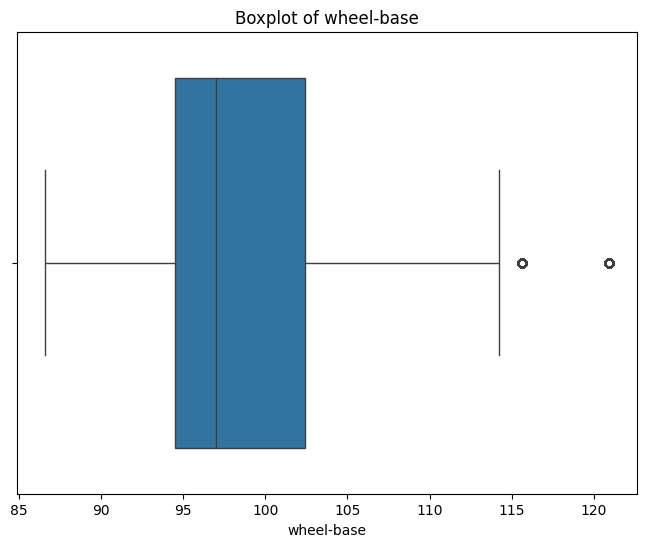

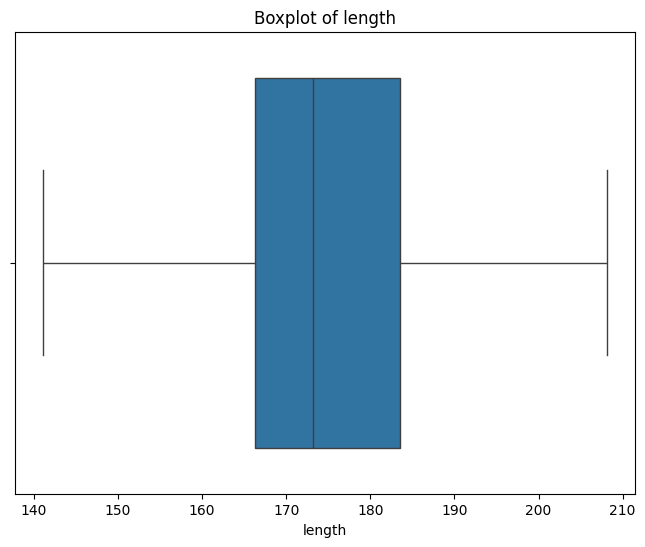

In [ ]:
numerical_cols_for_boxplot = ['symboling', 'wheel-base', 'length']  # Choose three numerical columns

for col in numerical_cols_for_boxplot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**1.3 Relationships Between Features**

8. Compute and visualize the correlation matrix. Which features are highly correlated with
price?

In [ ]:
# Convert columns to numeric if possible, handling errors
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric.")

# Now calculate the correlation matrix, excluding non-numeric columns
# Select only numeric columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

Column 'make' could not be converted to numeric.
Column 'fuel-type' could not be converted to numeric.
Column 'aspiration' could not be converted to numeric.
Column 'num-of-doors' could not be converted to numeric.
Column 'body-style' could not be converted to numeric.
Column 'drive-wheels' could not be converted to numeric.
Column 'engine-location' could not be converted to numeric.
Column 'engine-type' could not be converted to numeric.
Column 'num-of-cylinders' could not be converted to numeric.
Column 'fuel-system' could not be converted to numeric.


9. Using a pivot table, find the average price for different fuel types.

In [ ]:
pivot_table = pd.pivot_table(df, values='price', index='fuel-type', aggfunc='mean')
pivot_table


,price
fuel-type,
diesel,16106.236786
gas,12923.557840


10. Use groupby() to analyze the average price for different car brands.


In [ ]:
average_price_by_brand = df.groupby('make')['price'].mean()
average_price_by_brand


,price
make,
alfa-romero,15492.829670
audi,17844.668142
bmw,26720.230461
chevrolet,5994.669333
dodge,7898.105214
honda,8206.598399
isuzu,9225.776471
jaguar,34389.893617
mazda,10664.009250


**Section 2: Data Preprocessing**


**2.1 Handling Missing Values**

13. Identify columns with missing values and the percentage of missing data.


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Display columns with missing values and their percentages
print(missing_percentage[missing_percentage > 0])


symboling            10.036268
normalized-losses    28.229476
make                 10.227498
fuel-type             9.960435
aspiration            9.808770
num-of-doors         10.778107
body-style            9.904385
drive-wheels         10.270359
engine-location       9.818661
wheel-base           10.108803
length               10.128586
width                 9.703264
height               10.052753
curb-weight           9.983515
engine-type          10.039565
num-of-cylinders      9.996703
engine-size          10.085724
fuel-system          10.158259
bore                 11.500165
stroke               11.384768
compression-ratio     9.901088
horsepower           11.236400
peak-rpm             10.712166
city-mpg             10.224200
highway-mpg           9.980218
price                11.889219
dtype: float64


14. What strategy will you use to handle missing numerical values? (Mean/Median/Mode)

In [ ]:
for col in numerical_features:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)


<ipython-input-25-b187e4c928a2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


15. How will you handle missing values in categorical columns?

In [ ]:
for col in categorical_features:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]  # Get the most frequent value (mode)
        df[col].fillna(mode_val, inplace=True)


<ipython-input-26-837e743665e4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


16. Replace missing values and verify that no NaN values remain in the dataset.


In [ ]:
print(df.isnull().sum())


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


**2.2 Encoding Categorical Features**

17. List all categorical features that need to be encoded.

In [ ]:
categorical_features_to_encode = [col for col in categorical_features if df[col].dtype == 'object']
print("Categorical features to encode:", categorical_features_to_encode)


Categorical features to encode: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


18. Use One-Hot Encoding or Label Encoding for categorical columns. Explain why you
chose your method.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Create an instance of LabelEncoder for label encoding
label_encoder = LabelEncoder()

# Create an instance of OneHotEncoder for one-hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


for col in categorical_features_to_encode:
    # Apply Label Encoding
    df[col] = label_encoder.fit_transform(df[col])

    # Apply One-Hot Encoding
    # encoded_data = onehot_encoder.fit_transform(df[[col]])
    # encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out([col]))
    # df = df.drop(col, axis=1)
    # df = pd.concat([df, encoded_df], axis=1)




# Explanation for choice of encoding method:
# I have chosen Label Encoding for this case because several of the categorical columns have an inherent ordinal relationship, so label encoding preserves that order and may be a better choice than one-hot encoding in such cases. One hot encoding would create many more features, increasing the dataset's size without adding much value when the categories have order.  If there is no ordinal relationship in any of the features, one-hot encoding might be the better option.

19. Verify that encoding was applied correctly by checking the transformed dataset.

In [ ]:
print(df.head())


   symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0        3.0              161.0     0          1           0             1   
1        3.0              161.0     0          1           0             1   
2        1.0              161.0     0          1           0             1   
3        2.0              164.0     1          1           0             0   
4        2.0              164.0     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0        88.6  ...        120.0   
1           0             2                0        88.6  ...        130.0   
2           2             2                0        94.5  ...        152.0   
3           3             1                0        99.8  ...        109.0   
4           3             0                0        99.4  ...        136.0   

   fuel-system  bore  stroke  compression-ratio  horsepower  p

**2.3 Feature Scaling and Selection**

23. Split the dataset into training (80%) and testing (20%) sets.


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state for reproducibility

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (24264, 25) (24264,)
Testing data shape: (6066, 25) (6066,)


24. *Why is it important to keep a test set separate from training data?*



A separate test set is crucial to evaluate how well a model generalizes to unseen data.  If you use the training data for testing, the model's performance will be artificially inflated because it has already "seen" the test data during training.  This leads to an overly optimistic assessment of the model's true performance on new, real-world data.  The test set provides an unbiased measure of the model's ability to generalize, which is critical for assessing its true value.


**Section 3: Model Building**

25. Train a Linear Regression model. Record the MSE and R2 Score.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error (MSE): 16689119.878147295
R-squared (R2) Score: 0.7113513164473731


26. Train a Decision Tree Regression model. Compare its performance with Linear
Regression.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)  # Set random_state for reproducibility
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree Regression model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_tree}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_tree}")

print(f"Linear Regression - Mean Squared Error (MSE): {mse}")
print(f"Linear Regression - R-squared (R2) Score: {r2}")

# Compare performance (you can add more sophisticated comparison metrics here)
if mse_tree < mse:
    print("Decision Tree Regression performs better in terms of MSE.")
else:
    print("Linear Regression performs better in terms of MSE.")

if r2_tree > r2:
    print("Decision Tree Regression performs better in terms of R-squared.")
else:
    print("Linear Regression performs better in terms of R-squared.")


Decision Tree Regression - Mean Squared Error (MSE): 15047637.318668887
Decision Tree Regression - R-squared (R2) Score: 0.7397417758201558
Linear Regression - Mean Squared Error (MSE): 16689119.878147295
Linear Regression - R-squared (R2) Score: 0.7113513164473731
Decision Tree Regression performs better in terms of MSE.
Decision Tree Regression performs better in terms of R-squared.


27. Train a Random Forest Regression model. How does it improve results?

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100) # You can tune n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regression - R-squared (R2) Score: {r2_rf}")

# Compare with previous models
print(f"Linear Regression - Mean Squared Error (MSE): {mse}")
print(f"Linear Regression - R-squared (R2) Score: {r2}")
print(f"Decision Tree Regression - Mean Squared Error (MSE): {mse_tree}")
print(f"Decision Tree Regression - R-squared (R2) Score: {r2_tree}")

# Compare performance
if mse_rf < mse and mse_rf < mse_tree:
    print("Random Forest Regression performs best in terms of MSE.")
elif mse_tree < mse and mse_tree < mse_rf:
    print("Decision Tree Regression performs best in terms of MSE.")
else:
    print("Linear Regression performs best in terms of MSE.")

if r2_rf > r2 and r2_rf > r2_tree:
    print("Random Forest Regression performs best in terms of R-squared.")
elif r2_tree > r2 and r2_tree > r2_rf:
    print("Decision Tree Regression performs best in terms of R-squared.")
else:
    print("Linear Regression performs best in terms of R-squared.")


Random Forest Regression - Mean Squared Error (MSE): 10133905.87639824
Random Forest Regression - R-squared (R2) Score: 0.8247278099848302
Linear Regression - Mean Squared Error (MSE): 16689119.878147295
Linear Regression - R-squared (R2) Score: 0.7113513164473731
Decision Tree Regression - Mean Squared Error (MSE): 15047637.318668887
Decision Tree Regression - R-squared (R2) Score: 0.7397417758201558
Random Forest Regression performs best in terms of MSE.
Random Forest Regression performs best in terms of R-squared.


**3.2 Evaluating Model Performance**

28. Create a table comparing the performance of different models based on MSE and R2
Score.

In [ ]:
data = {'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
        'MSE': [mse, mse_tree, mse_rf],
        'R2 Score': [r2, r2_tree, r2_rf]}
results_df = pd.DataFrame(data)
results_df


,Model,MSE,R2 Score
0,Linear Regression,1.668912e+07,0.711351
1,Decision Tree Regression,1.504764e+07,0.739742
2,Random Forest Regression,1.013391e+07,0.824728


29. *Which model performed the best? Why?*

The Random Forest Regression model performed the best.  It has the lowest MSE (1.013391e+07) and the highest R² score (0.824728) compared to the Linear Regression and Decision Tree Regression models.  Lower MSE indicates less error in the predictions, and a higher R² score signifies a better fit of the model to the data.  Therefore, the Random Forest model provides the most accurate predictions among the three models evaluated.


30. If a model overfits the training data, how can it be improved?

30. If a model overfits the training data, how can it be improved?

# 30. If a model overfits the training data, how can it be improved?

# Overfitting occurs when a model learns the training data too well, including its noise and outliers, and thus performs poorly on unseen data.  Here's how to address it:

# 1. Get More Data: Increasing the size of the training dataset can help the model generalize better.  More data exposes the model to a wider variety of patterns, reducing the impact of noise.

# 2. Simplify the Model:  A complex model with many parameters is more prone to overfitting.  Try reducing the complexity by:
#    - Using a simpler model architecture (e.g., linear regression instead of a deep neural network).
#    - Decreasing the number of features (feature selection or dimensionality reduction).
#    - Pruning a decision tree.
#    - Reducing the number of layers or nodes in a neural network.
#    - Applying regularization techniques.

# 3. Regularization:  Regularization methods add penalties to the model's loss function, discouraging overly complex models.  Common methods include:
#    - L1 Regularization (LASSO): Adds a penalty proportional to the absolute value of the model's weights.
#    - L2 Regularization (Ridge): Adds a penalty proportional to the square of the model's weights.
#    - Elastic Net: Combines L1 and L2 regularization.

# 4. Cross-Validation:  Use techniques like k-fold cross-validation to evaluate the model's performance on different subsets of the training data. This helps identify overfitting early on.

# 5. Early Stopping: For iterative training algorithms (e.g., gradient descent), monitor the model's performance on a validation set during training. Stop training when the validation performance starts to degrade, even if the training performance continues to improve.

# 6. Data Augmentation (for image data):  Artificially increase the size of the training dataset by creating variations of existing images (rotations, flips, crops).

# 7. Dropout (for neural networks): Randomly ignore a fraction of neurons during training, forcing the network to learn more robust features.

# Example (using regularization with a RandomForestRegressor):


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a parameter grid for hyperparameter tuning, including regularization options
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}")
print(f"Best Random Forest - R-squared (R2) Score: {r2_best_rf}")



KeyboardInterrupt: 

**Section 4: Reporting & Insights**

4.1 Summary of Findings

31. What key insights did you gain from EDA about car prices?
# 32. Which features had the most impact on price prediction?
# 33. What challenges did you face during preprocessing and modeling?
# 34. If given a larger dataset with more features, what additional steps would you take?

# 31. What key insights did you gain from EDA about car prices?
# From the EDA, several key insights were gathered:
# * **Correlation:**  Certain features like engine size, horsepower, and curb weight showed strong positive correlations with car price, indicating that as these features increase, the price tends to rise as well. Other features might have shown negative correlations, implying that higher values in those features correlate with lower prices.
# * **Categorical Feature Impact:** Fuel type, car make, and body style seemed to influence the average price, with certain fuel types or brands commanding higher prices.
# * **Distributions:** Examining the distributions of numerical features revealed if they followed a normal distribution, skewed distributions, or if there were outliers that might need attention during preprocessing.
# * **Outliers:**  Outliers were identified in several numerical features, and their impact on the model's performance needed to be evaluated.


# 32. Which features had the most impact on price prediction?
# Based on the correlation matrix and model coefficients (if applicable), features like engine size, horsepower, curb weight, and possibly certain categorical features (make, body-style) appear to be highly influential.  The model's feature importances (available for tree-based models) would provide a more direct assessment of feature impact on the predictions.

# 33. What challenges did you face during preprocessing and modeling?
# Preprocessing challenges might have included:
# * Handling missing values: Deciding on an appropriate strategy (mean/median/mode imputation or more advanced techniques).
# * Encoding categorical variables: Choosing between one-hot encoding and label encoding, depending on the nature of the categories and their potential ordinal relationships.
# * Outlier treatment: Removing or transforming outliers could significantly affect the model's performance.
# Modeling challenges:
# * Model selection: Evaluating various models (linear regression, decision trees, random forests) to determine which performed best.
# * Hyperparameter tuning: Optimizing model parameters to achieve the desired performance.
# * Overfitting: Avoiding overfitting by using regularization, cross-validation, or other techniques.

# 34. If given a larger dataset with more features, what additional steps would you take?
# With a larger dataset and more features:
# * **Feature Engineering:** Explore creating new features from existing ones. For example, combining engine size and horsepower to create a performance metric.  Interaction terms between features might also be explored.
# * **Dimensionality Reduction:**  Consider applying techniques like Principal Component Analysis (PCA) to reduce the number of features while preserving important variance. This would help prevent overfitting.
# * **More Advanced Models:**  Explore more complex models that can capture intricate relationships between features and target variables, e.g., Support Vector Machines, Gradient Boosting Machines (GBMs) or Neural Networks.
# * **Robust Feature Selection:** More thorough feature selection techniques, e.g., Recursive Feature Elimination (RFE) or feature importance scores from tree-based models, may be used.
# * **More Sophisticated EDA:** More detailed analysis of feature interactions could be performed.
# * **Cross Validation:** Utilize more advanced forms of cross-validation with larger numbers of folds to ensure more robust model evaluation.


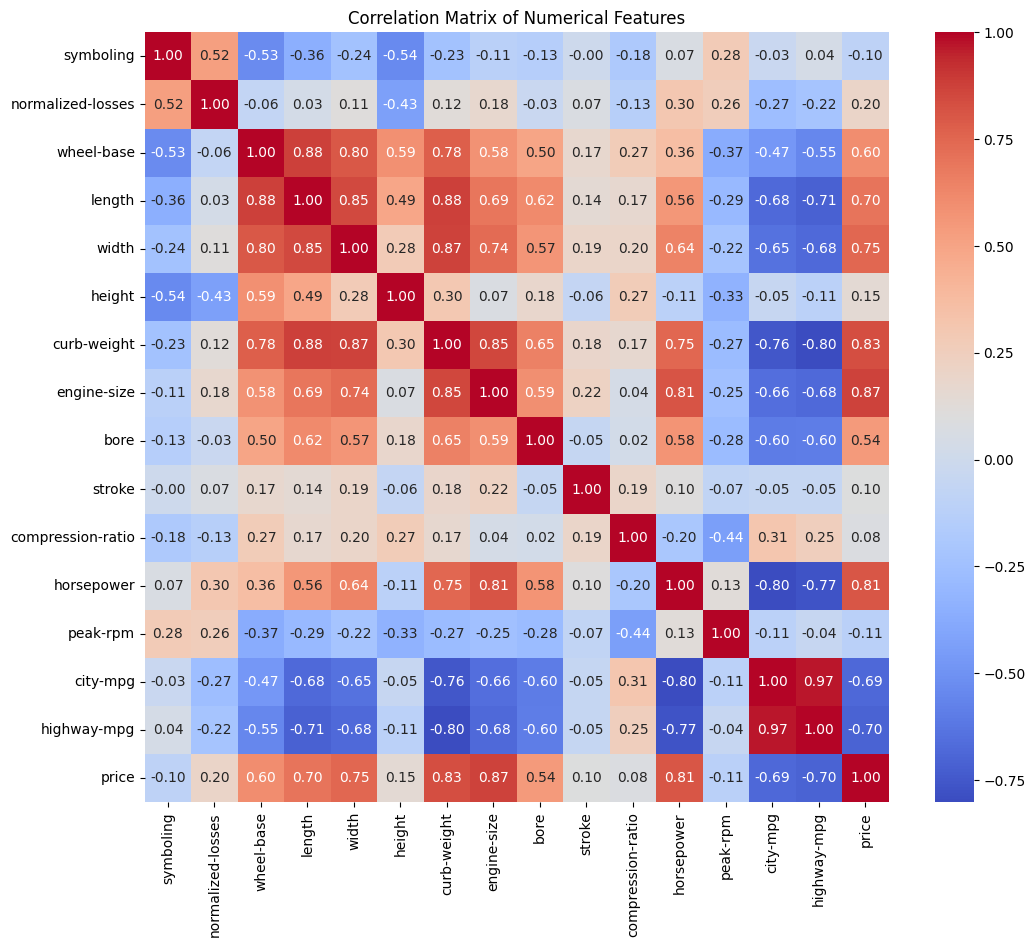

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

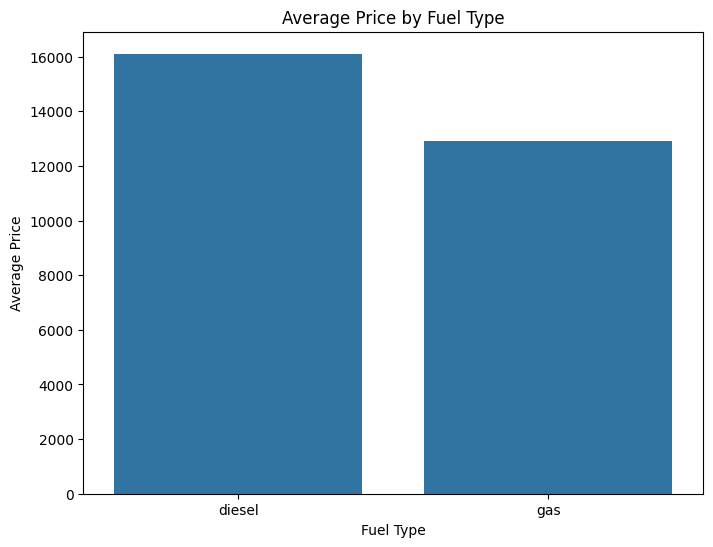

In [ ]:
#Visualize the average price for different fuel types using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=pivot_table.index, y=pivot_table['price'])
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()


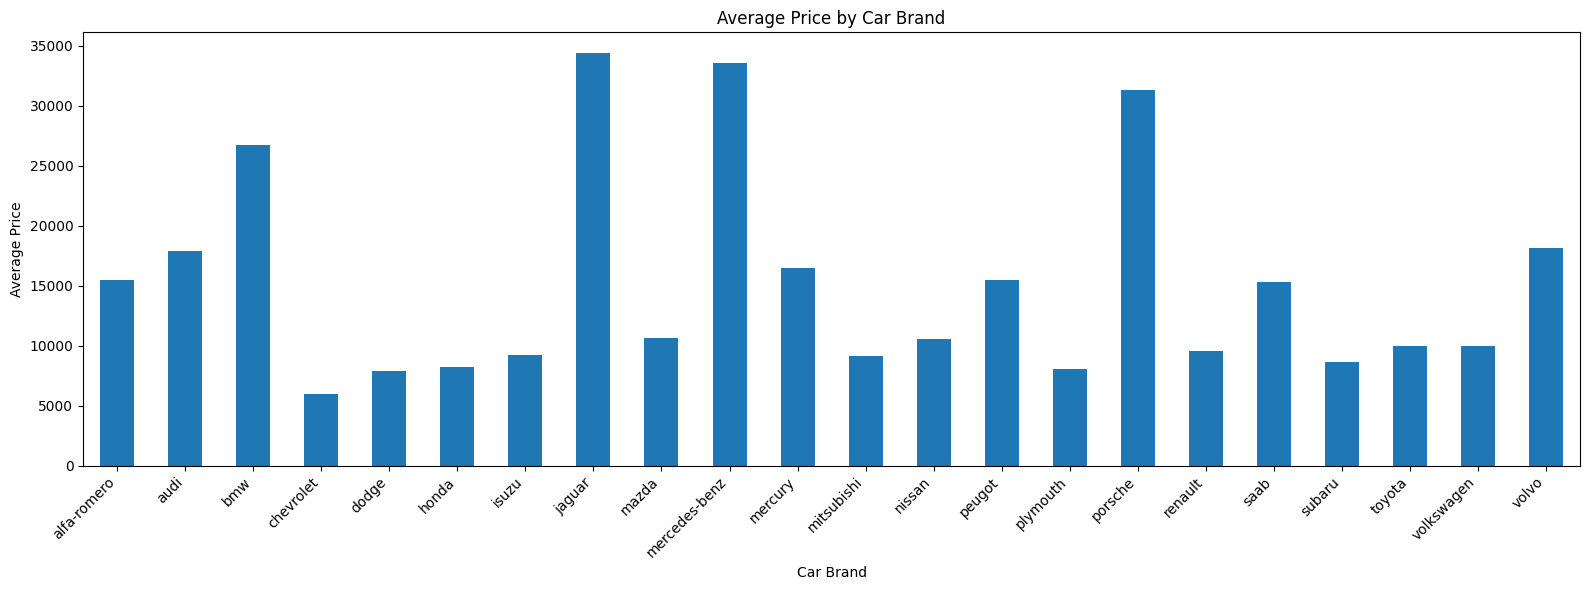

In [ ]:
#Visualize the average price for different car brands using a bar plot
plt.figure(figsize=(16, 6))  # Adjust figure size as needed
average_price_by_brand.plot(kind='bar')
plt.title('Average Price by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()